<a href="https://colab.research.google.com/github/MsAnalyst/TugasIntroML/blob/main/Dewi_I4Zs_IntroML_Final_Project_Chronic_Kidney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I. Import library

In [ ]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score # akurasi
from sklearn.metrics import classification_report # report model
from sklearn.model_selection import train_test_split # pembagian data train dan test
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26) #display dataframe dengan jumlah kolom ditentukan

## II. Loading Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA PACMANN/INTRO TO ML I/Final Project Intro ML Dewi_I4Zs/kidney_disease.csv')

In [ ]:
# show top 5 data

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# show shape of dataset
df.shape

(400, 26)

In [ ]:
# show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# describe the dataset
df.describe().style.background_gradient(cmap = 'copper')

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [ ]:
# to understand the columns of dataset we can rename the data and set original names
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sulfonylurea', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sulfonylurea,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# converting necessary columns to numerical type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sulfonylurea             351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# replace for incorect value 

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sulfonylurea             351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

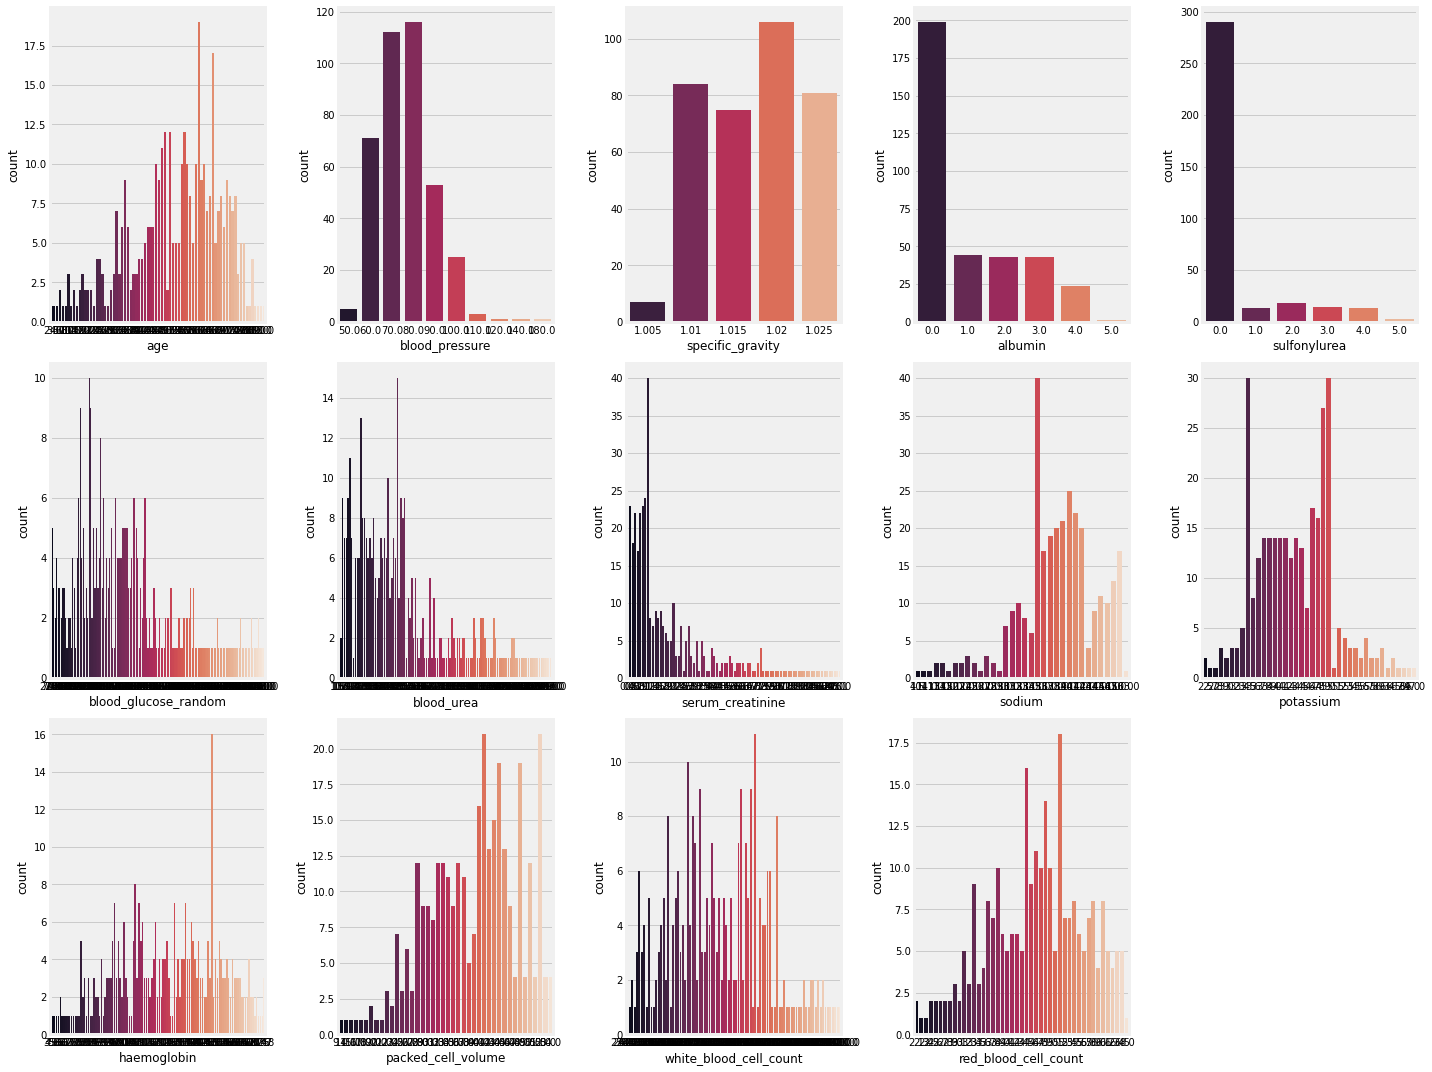

In [ ]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(df[column], palette = 'rocket', color='black')
        plt.xlabel(column)
       
    plotnumber += 1

plt.tight_layout()
plt.show()

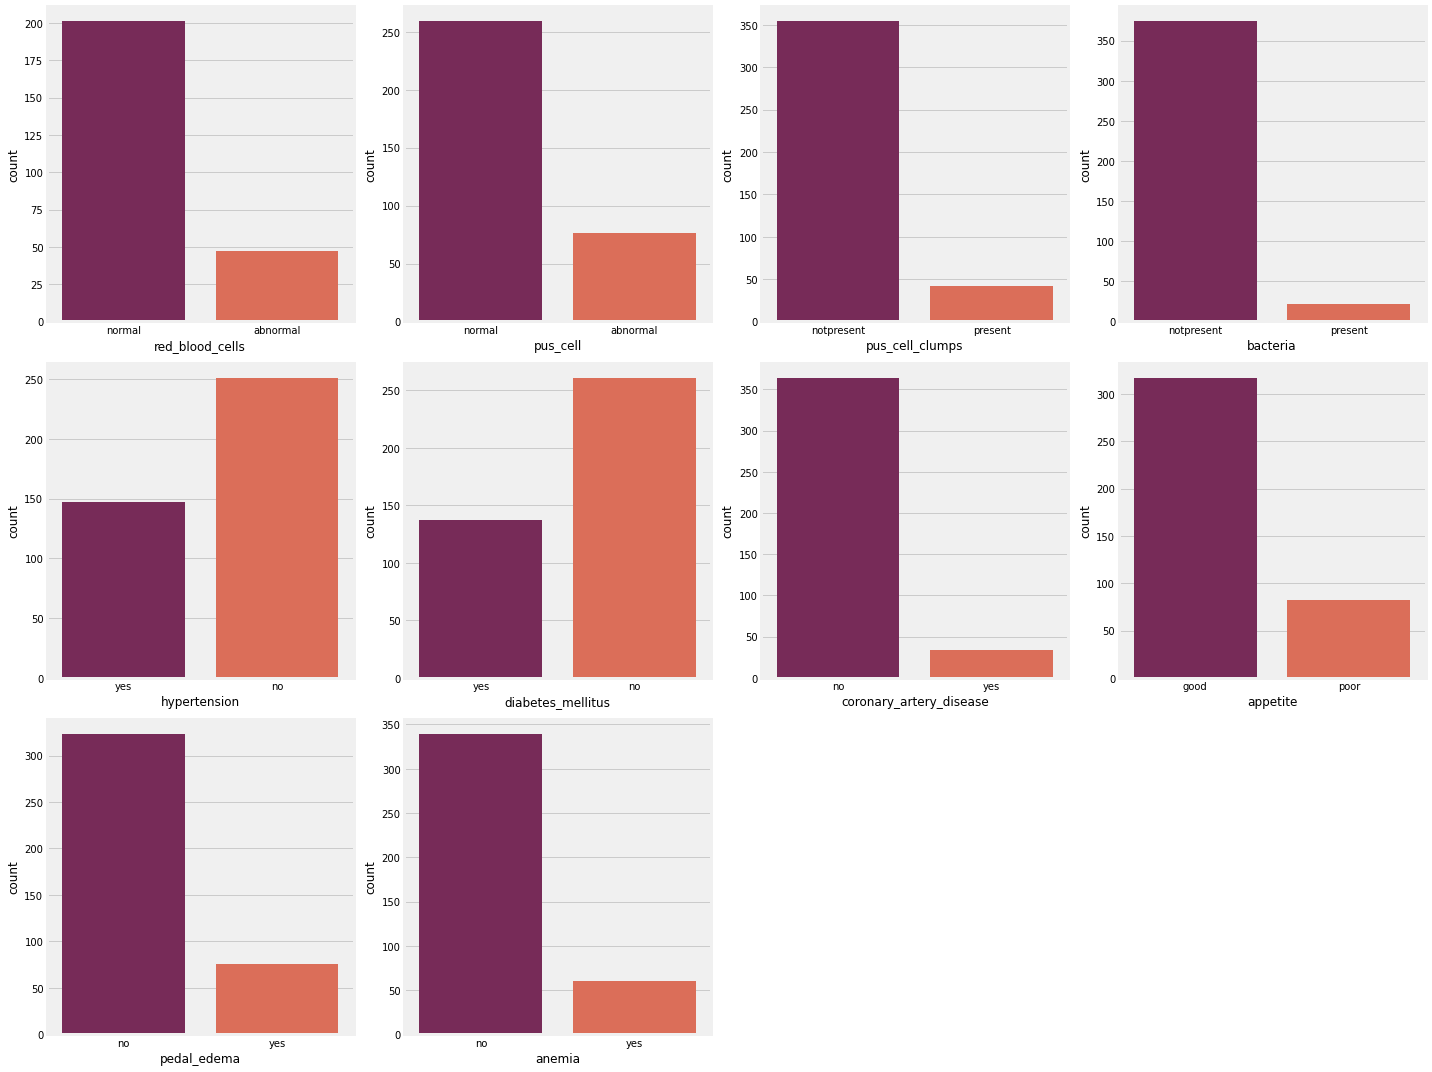

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket',color='copper')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# III. Exploratory Data Analysis (EDA)

In [ ]:
df = df[['blood_pressure', 'specific_gravity', 'albumin', 'sulfonylurea', 'blood_glucose_random', 'blood_urea', 'serum_creatinine',
         'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
         'pedal_edema', 'anemia', 'class']]

In [ ]:
df

,blood_pressure,specific_gravity,albumin,sulfonylurea,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,pedal_edema,anemia,class
0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,no,no,0
1,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,0
2,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,no,yes,0
3,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,yes,yes,0
4,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,1
396,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,1
397,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,1
398,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,1


In [ ]:
# checking for null values and correct it

df.isna().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sulfonylurea               49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
hypertension                2
pedal_edema                 1
anemia                      1
class                       0
dtype: int64

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
df[num_cols].isnull().sum()

blood_pressure             12
specific_gravity           47
albumin                    46
sulfonylurea               49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [ ]:
cat_cols = list(set(df.columns) - set(num_cols))

# IV. Data Preprocessing

In [ ]:
df[cat_cols].isnull().sum()

pedal_edema     1
hypertension    2
anemia          1
dtype: int64

In [ ]:
def impute_mean(feature):
    df[feature] = df[feature].fillna(df[feature].mean())
    
def impute_mode(feature):
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    impute_mean(col)
df[num_cols].isnull().sum()

blood_pressure            0
specific_gravity          0
albumin                   0
sulfonylurea              0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [ ]:
for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

pedal_edema     0
hypertension    0
anemia          0
dtype: int64

## Feature Encoding 

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

pedal_edema has 2 categories

hypertension has 2 categories

anemia has 2 categories



## Label Encoder

In [ ]:
df.head()

,blood_pressure,specific_gravity,albumin,sulfonylurea,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,pedal_edema,anemia,class
0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,no,no,0
1,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,0
2,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,no,yes,0
3,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,yes,yes,0
4,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,blood_pressure,specific_gravity,albumin,sulfonylurea,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,pedal_edema,anemia,class
0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,0,0,0
1,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,0
2,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,0,1,0
3,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,1,1,0
4,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,0


## Correlation

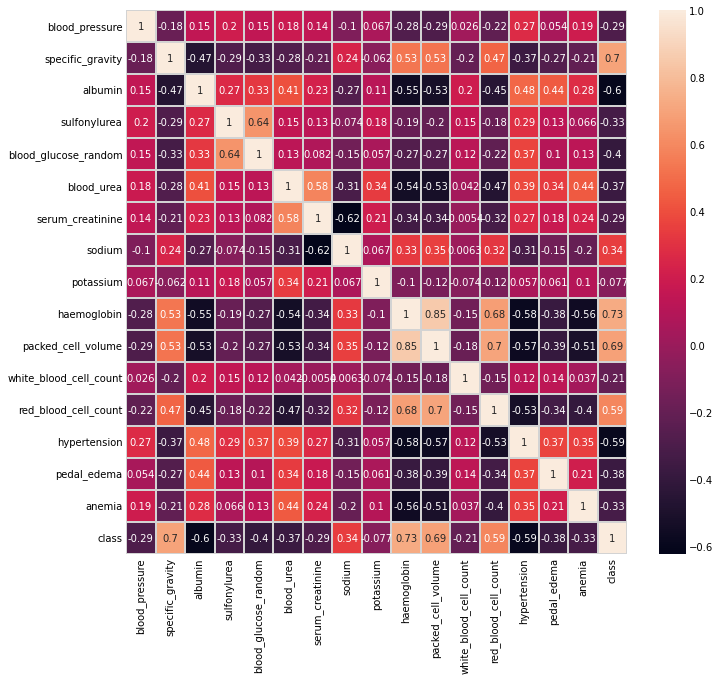

In [ ]:
# Calculation the correlation

plt.figure(figsize=(10,10))
cor=df.corr()
sns.heatmap(cor, annot = True, linewidths = 1, linecolor = 'lightgrey')

# IV. Feature Engineering

With sklearn.model_selection.train_test_split, we are creating 4 portions of data which will be used for fitting & predicting values.

In [ ]:
# data splitting in X,y
X = df.drop(columns=['class']) #kolom yang mau dihapus dan gak dipakai
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("The shape of X_train", X_train.shape)
print("The shape of X_test", X_test.shape)
print("The shape of y_train", y_train.shape)
print("The shape of y_test", y_test.shape)

The shape of X_train (320, 16)
The shape of X_test (80, 16)
The shape of y_train (320,)
The shape of y_test (80,)


## A. Model

### Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier()
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [ ]:
print('model_DT Accuracy is: ' , model_dt.score(X_test, y_test))

model_DT Accuracy is:  1.0


In [ ]:
print('The DT accuracy score is: ' , accuracy_score(y_test , y_pred) *100, '%')

NameError: ignored

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, pred_dt)

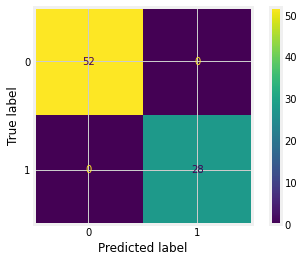

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_dt.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Creating model object
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
pred_knn = model_knn.predict(X_test)

In [ ]:
print('The KNN Accuracy is: ' , model_knn.score(X_test, y_test)*100, '%')

The KNN Accuracy is:  73.75 %


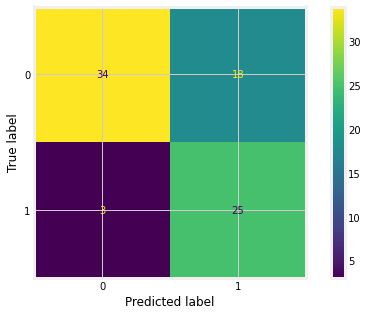

In [ ]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(model_knn,X_test,y_test);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76        52
           1       0.58      0.89      0.70        28

    accuracy                           0.74        80
   macro avg       0.75      0.77      0.73        80
weighted avg       0.80      0.74      0.74        80



### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# Creating model object
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred_nb = model_nb.predict(X_test)

In [ ]:
print('The Naive Bayes accuracy score is:' , model_nb.score(X_test, y_test)*100, '%')

The Naive Bayes accuracy score is: 93.75 %


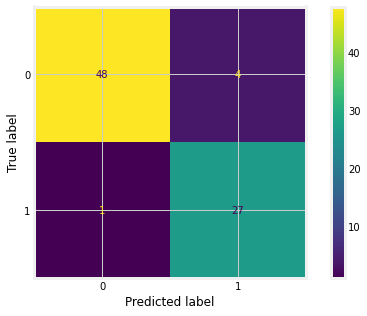

In [ ]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(model_nb,X_test,y_test);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



### Probabilistic Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
# Creating model object
model_nn = MLPClassifier()
model_nn.fit(X_train, y_train)

MLPClassifier()

In [ ]:
pred_nn = model_nn.predict(X_test)

In [ ]:
print('The Probabilistics Neural Networks accuracy score is: ' , model_nn.score(X_test, y_test)*100,'%')

The Probabilistics Neural Networks accuracy score is:  82.5 %


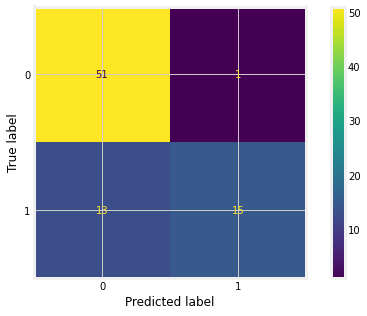

In [ ]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(model_nn,X_test,y_test);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        52
           1       0.94      0.54      0.68        28

    accuracy                           0.82        80
   macro avg       0.87      0.76      0.78        80
weighted avg       0.85      0.82      0.81        80



### Random Forest Classifier


In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = model_rf.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
print('The RF model accuracy is: ' , model_rf.score(X_test, y_test))

The RF model accuracy is:  0.9875


In [ ]:
print("The RF accuracy score is: ",accuracy_score(y_test , y_pred)*100, '%')

The RF accuracy score is:  98.75 %


In [ ]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

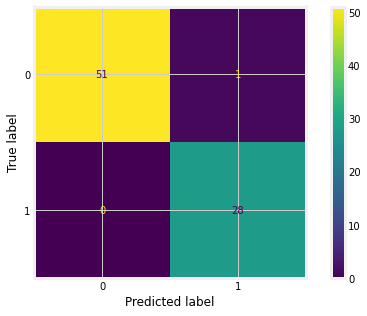

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model_rf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
# Creating model object
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
pred_svm = model_svm.predict(X_test)

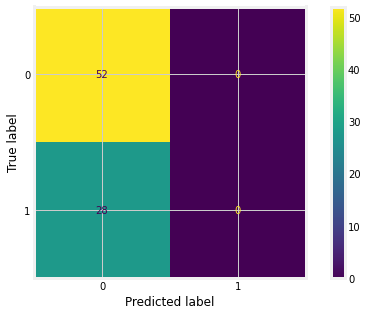

In [ ]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(model_svm,X_test,y_test);

In [ ]:
print('The SVM accuracy score is: ' , model_svm.score(X_test, y_test)*100, '%')

The SVM accuracy score is:  65.0 %


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
pred_xgb= model_xgb.predict(X_test)

In [ ]:
print('The XGBoost accuracy score is: ' , model_xgb.score(X_test, y_test) *100, '%')

The XGBoost accuracy score is:  98.75 %


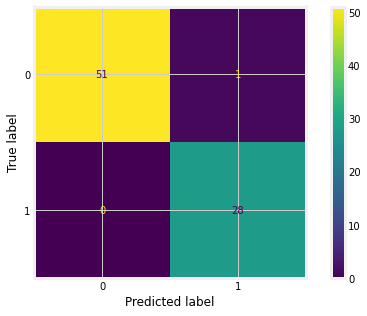

In [ ]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(model_xgb,X_test,y_test);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

#X, y = load_breast_cancer(return_X_y= True)

models_list =[DecisionTreeClassifier(),
		KNeighborsClassifier(),
		GaussianNB(),
		MLPClassifier(),
              RandomForestClassifier(random_state = 0),
              SVC(probability= True),
              GaussianNB()]

score_list = ["accuracy", "f1-score", "precision", "recall"]
plt.barh(x,y)
plt.xlabel("Values")
plt.ylabel('Categories')
plt.title('Accuracy for Every Model')
plt.show()


#t = plot_cv_score(X = X, y = y, models_list = models_list, cv = 7, scoring_list = score_list, refit = True)

NameError: ignored

## B. Feature Importance High Accuracy Model



## Test Highest Model

### FI on RF

In [ ]:
model_rf.feature_importances_

array([0.00506065, 0.20571568, 0.09715737, 0.01104748, 0.06172485,
       0.00871467, 0.22794792, 0.02708364, 0.00504948, 0.16781174,
       0.03687536, 0.01219348, 0.12584608, 0.00208204, 0.00568956,
       0.        ])

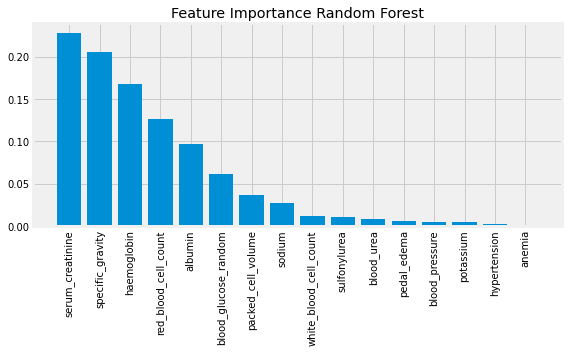

In [ ]:
import numpy as np
 
importances = model_rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance Random Forest')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### FI on DT

In [ ]:
model_dt.feature_importances_

array([0.        , 0.1999367 , 0.        , 0.        , 0.01589667,
       0.02195604, 0.00977303, 0.01059778, 0.        , 0.69712639,
       0.00242584, 0.        , 0.01624215, 0.02604539, 0.        ,
       0.        ])

In [ ]:
import numpy as np
 
importances = model_dt.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) packed_cell_volume             0.697126
 2) albumin                        0.199937
 3) pedal_edema                    0.026045
 4) serum_creatinine               0.021956
 5) hypertension                   0.016242
 6) blood_urea                     0.015897
 7) potassium                      0.010598
 8) sodium                         0.009773
 9) white_blood_cell_count         0.002426
10) class                          0.000000
11) anemia                         0.000000
12) red_blood_cell_count           0.000000
13) haemoglobin                    0.000000
14) blood_glucose_random           0.000000
15) sulfonylurea                   0.000000
16) specific_gravity               0.000000


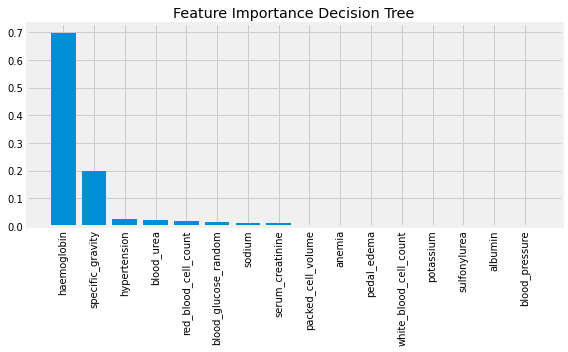

In [ ]:
import numpy as np
 
importances = model_dt.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance Decision Tree')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### FI on XGB

In [ ]:
model_xgb.feature_importances_

array([0.        , 0.2908242 , 0.12790804, 0.        , 0.01551084,
       0.00723647, 0.03180644, 0.03709164, 0.02449836, 0.42771423,
       0.00681133, 0.00214149, 0.02845696, 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
import numpy as np
 
importances = model_xgb.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) packed_cell_volume             0.427714
 2) albumin                        0.290824
 3) sulfonylurea                   0.127908
 4) potassium                      0.037092
 5) sodium                         0.031806
 6) hypertension                   0.028457
 7) haemoglobin                    0.024498
 8) blood_urea                     0.015511
 9) serum_creatinine               0.007236
10) white_blood_cell_count         0.006811
11) red_blood_cell_count           0.002141
12) class                          0.000000
13) anemia                         0.000000
14) pedal_edema                    0.000000
15) blood_glucose_random           0.000000
16) specific_gravity               0.000000


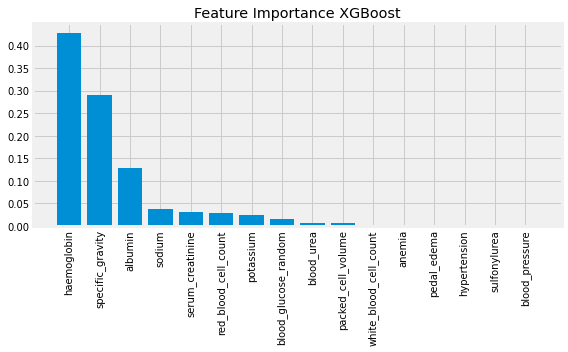

In [ ]:
import numpy as np
 
importances = model_xgb.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance XGBoost')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
X_test[0:1]

,blood_pressure,specific_gravity,albumin,sulfonylurea,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,pedal_edema,anemia
209,70.0,1.02,0.0,0.0,148.036517,57.425722,3.072454,137.528754,4.627244,11.5,38.884498,6900.0,4.707435,0,0,0


In [ ]:
data = [[70.0, 1.02,	0.0,	0.0,	148.036517,	57.425722,	3.072454,	137.528754,	
         4.627244,	11.5,	38.884498,	6900.0,	4.707435,	0, 0, 0]]

model_rf.predict(data)



array([0])